# Data

I started by loading the data set and dropped unannotated rows:

In [1]:
import pandas as pd

df = pd.read_csv("../data/over_annotated.csv")
df = df[df["simple"].notnull()]
df.head()

,File,lhs,Unnamed: 2,rhs,order,simple
45,wlp_2000s_iey/fic_2009_36374.txt,New Zealand Yarns . <p> www.fibertrends.com <p...,over,the Open sign at my yarn store on Blossom Stre...,46,6
79,wlp_2000s_iey/fic_2009_36348.txt,". His own daughter , Kristi , was in her twent...",over,". <p> No , what he needed was to get out of th...",80,6A
94,wlp_2000s_iey/mag_2004_411603.txt,"with fuzzy colors , and I really got a kick ou...",over,"the phone , you told me that I attached @ @ @ ...",95,7
102,wlp_2000s_iey/fic_2000_27982.txt,head of a startled farmer 's wife who could n'...,over,"her basket , losing precious seconds as he fou...",103,1
132,wlp_2000s_iey/fic_2004_31424.txt,you forever . That 's fifteen dollars for the ...,over,a twenty-dollar bill . The dog cowered when sh...,133,2D


## Count vector tests

To create count vectors (which can be helpful to see if there are any strong lexical effects), I merged the left-hand-side context (lhs) and right-hand-side context (rhs) into one 'sentence'. Note that 'over' can be dropped, as it needn't be included in the co-occurence matrix.

In [2]:
df['sentence'] = df['lhs'] + ' ' + df['rhs']
df.head()

,File,lhs,Unnamed: 2,rhs,order,simple,sentence
45,wlp_2000s_iey/fic_2009_36374.txt,New Zealand Yarns . <p> www.fibertrends.com <p...,over,the Open sign at my yarn store on Blossom Stre...,46,6,New Zealand Yarns . <p> www.fibertrends.com <p...
79,wlp_2000s_iey/fic_2009_36348.txt,". His own daughter , Kristi , was in her twent...",over,". <p> No , what he needed was to get out of th...",80,6A,". His own daughter , Kristi , was in her twent..."
94,wlp_2000s_iey/mag_2004_411603.txt,"with fuzzy colors , and I really got a kick ou...",over,"the phone , you told me that I attached @ @ @ ...",95,7,"with fuzzy colors , and I really got a kick ou..."
102,wlp_2000s_iey/fic_2000_27982.txt,head of a startled farmer 's wife who could n'...,over,"her basket , losing precious seconds as he fou...",103,1,head of a startled farmer 's wife who could n'...
132,wlp_2000s_iey/fic_2004_31424.txt,you forever . That 's fifteen dollars for the ...,over,a twenty-dollar bill . The dog cowered when sh...,133,2D,you forever . That 's fifteen dollars for the ...


### Binary feature vector

The count vectors will be created by means of 'CounterVectorizer'. One way of approaching this is by transforming the co-occurence matrix into binary features (is X present or not) rather than relative frequencies, and by excluding 'stopwords':

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, stop_words="english")
# tokenize and build vocab
X = vectorizer.fit_transform(df['sentence'].values).toarray()

Now, we can make a two-dimensional representation of count vectors by means of t-SNE:

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Y_tsne = TSNE(
    perplexity=20, 
    method='exact', 
    init='pca', 
    verbose=True
).fit_transform(X)

# set colours (also used in figures below)
colormap = {
    '1': '#000000',
    '2A': '#CC9900',
    '2B': '#996600',
    '2C': '#CC6633',
    '2D': '#FF6600',
    '2E': '#CC9966',
    '3': '#996666',
    '4': '#336633',
    '4A': '#669966',
    '5A': '#336699',
    '5B': '#003366',
    '5C': '#336666',
    '6': '#993333',
    '6A': '#990000',
    '7': '#999999',
    '8': '#666666',
    '?': '#FFFFFF',
}

fig, ax = plt.subplots(figsize=(10, 10))

labels = df["simple"].values
for label in sorted(df["simple"].unique()):
    Y = Y_tsne[labels == label]
    ax.scatter(Y[:, 0], Y[:, 1], c=colormap[label], label=label, alpha=0.8)
ax.axis('off')
ax.legend(loc="center right", frameon=False,  bbox_to_anchor=(1.1, 0.5), title="Categories")

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 808 / 808
[t-SNE] Mean sigma: 0.929726
[t-SNE] KL divergence after 250 iterations with early exaggeration: 170.500800
[t-SNE] KL divergence after 1000 iterations: 3.359719


Or, alternatively, a two-dimensional representation of count vectors by means of umap:

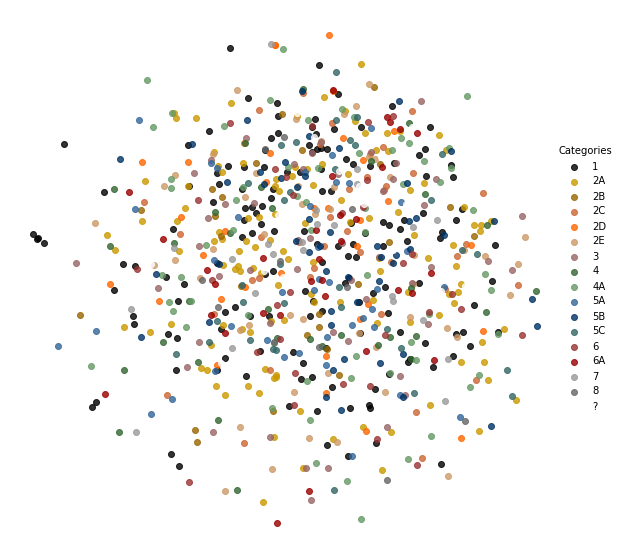

In [5]:
import umap

Y_umap = umap.UMAP(min_dist=0.01).fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))

labels = df["simple"].values
for label in sorted(df["simple"].unique()):
    Y = Y_umap[labels == label]
    ax.scatter(Y[:, 0], Y[:, 1], c=colormap[label], label=label, alpha=0.8)
ax.axis('off')
ax.legend(loc="center right", frameon=False,  bbox_to_anchor=(1.1, 0.5), title="Categories")

Or a two-dimensional representation of count vectors by means of pca (note that the explained variance ratio is also printed:

[0.00633885 0.00599529]


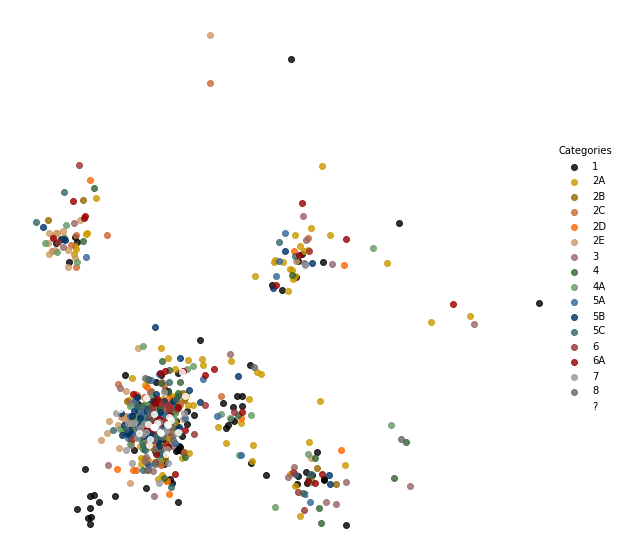

In [6]:
# Plot two-dimensional representation of count vectors by means of pca

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
Y_pca = pca.transform(X)
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(10, 10))

labels = df["simple"].values
for label in sorted(df["simple"].unique()):
    Y = Y_pca[labels == label]
    ax.scatter(Y[:, 0], Y[:, 1], c=colormap[label], label=label, alpha=0.8)
ax.axis('off')
ax.legend(loc="center right", frameon=False,  bbox_to_anchor=(1.1, 0.5), title="Categories")

# Embeddings with BERT

First, I loaded the Spacy implementation of BERT-base:

In [7]:
import spacy
import numpy as np

nlp = spacy.load("en_trf_bertbaseuncased_lg") #BERT-base spacy 

I1109 21:18:47.446981 4596598208 file_utils.py:39] PyTorch version 1.1.0.post2 available.
I1109 21:18:47.513657 4596598208 modeling_xlnet.py:194] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


Then, I determined the position of 'over' in the example sentences (which is needed to extract the right embedding):

In [8]:
df["over_index"] = df["lhs"].apply(lambda x: len(nlp.tokenizer(x)))

Subsequently, I created an empty dictionary to store the embeddings in:

In [9]:
vectors = {}

Now, we can create the embeddings (warning: this may take a long time if ran locally!):

In [10]:
import tqdm

for id, row in tqdm.tqdm(df.iterrows(), total=len(df)):
    example = row["lhs"] + " over " + row["rhs"]
    index = row["over_index"]
    if id not in vectors:
        doc = nlp(example)
        if not str(doc[index]) == "over":
            doc = nlp(" ".join(sample.split()))
        if not str(doc[index]) == "over":
            overs = [i for i, token in enumerate(doc) if str(token) == "over"]
            if len(overs) == 1:
                index = overs[0]
            else:
                print("Missing one")
                continue
        vectors[id] = doc[index]

100%|██████████| 808/808 [04:51<00:00,  2.78it/s]


The next step involves unzipping vector dictionary into two parallel iterables, with ids holding the sentence ids and emb holding the corresponding embeddings:

In [11]:
ids, emb = zip(*[(id, token.vector) for id, token in vectors.items()])
emb = np.array(emb)

In the paper, I chose to continue the analyses without ambiguous examples (labelled with '?'):

In [12]:
df['simple'] = df['simple'].astype(str)
labels = df["simple"].str.strip().values
df = df[labels != "?"]
emb = emb[labels != "?"]

Again, we can create two-dimensional representations (in order: umap, t-SNE, and PCA):

In [13]:
# Prep two-dimensional representation of count vectors by means of umap
Y_umap = umap.UMAP(n_neighbors=30).fit_transform(emb)

source = pd.DataFrame(Y_umap, columns=["X", "Y"])
source["label"] = [str(c) for c in df["simple"]]
source.head()

,X,Y,label
0,3.139878,-2.180729,6
1,-7.345181,-6.303185,6A
2,-0.463541,-4.549659,7
3,2.642462,-1.242712,1
4,4.423335,1.459447,2D


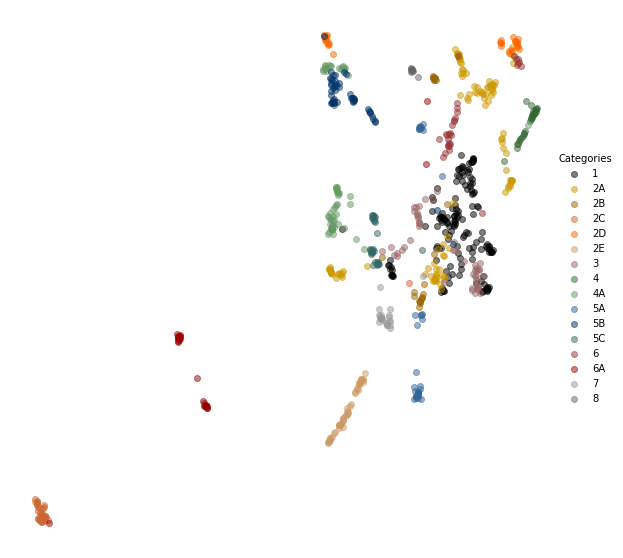

In [14]:
# Plot two-dimensional representation of embeddings by means of umap

fig, ax = plt.subplots(figsize=(10, 10))

labels = df["simple"].values
for label in sorted(df["simple"].unique()):
    Y = Y_umap[labels == label]
    ax.scatter(Y[:, 0], Y[:, 1], c=colormap[label], label=label, alpha=0.5)
ax.axis('off')
ax.legend(loc="center right", frameon=False,  bbox_to_anchor=(1.1, 0.5), title="Categories")

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 782 / 782
[t-SNE] Mean sigma: 3.701168
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.467307
[t-SNE] KL divergence after 1000 iterations: 0.475913


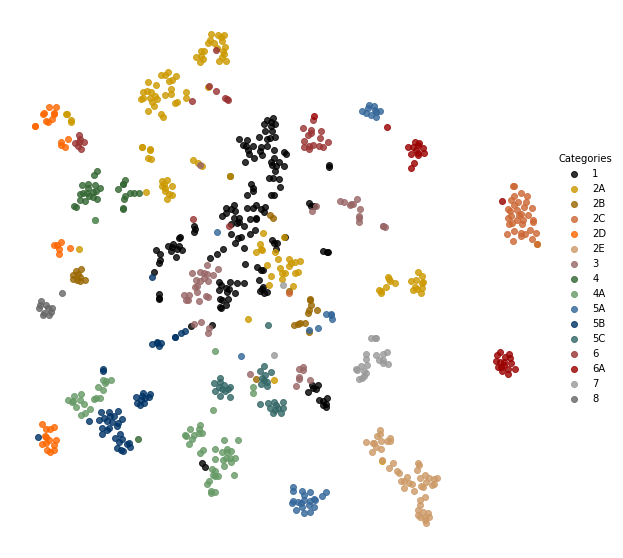

In [15]:
# Plot two-dimensional representation of embeddings by means of t-SNE

Y_tsne = TSNE(
    perplexity=20, 
    method='exact', 
    init='pca', 
    verbose=True
).fit_transform(emb)

fig, ax = plt.subplots(figsize=(10, 10))

labels = df["simple"].values
for label in sorted(df["simple"].unique()):
    Y = Y_tsne[labels == label]
    ax.scatter(Y[:, 0], Y[:, 1], c=colormap[label], label=label, alpha=0.8)
ax.axis('off')
ax.legend(loc="center right", frameon=False,  bbox_to_anchor=(1.1, 0.5), title="Categories")

[0.0631311  0.04182835]


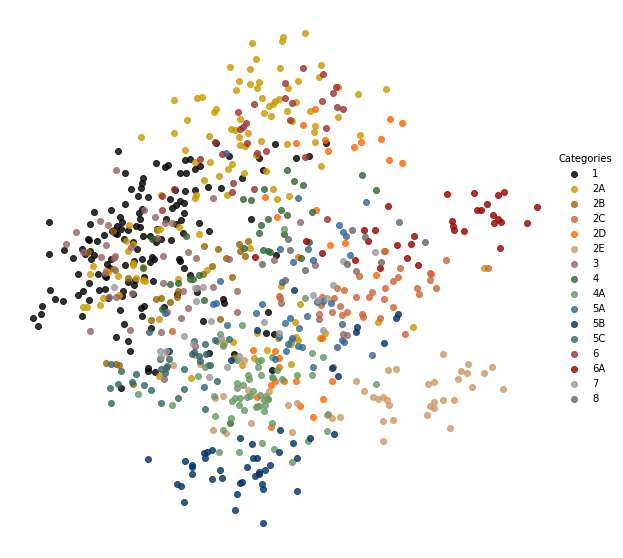

In [16]:
# Plot two-dimensional representation of embeddings by means of PCA

pca = PCA(n_components=2).fit(emb)
Y_pca = pca.transform(emb)
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(10, 10))

labels = df["simple"].values
for label in sorted(df["simple"].unique()):
    Y = Y_pca[labels == label]
    ax.scatter(Y[:, 0], Y[:, 1], c=colormap[label], label=label, alpha=0.8)
ax.axis('off')
ax.legend(loc="center right", frameon=False,  bbox_to_anchor=(1.1, 0.5), title="Categories")

## Cluster Tree

The following code can be used to recreate the hierarchical cluster tree presented in Section 4.2. The tree will not appear below, but can be saved and viewed by means of Figtree (http://tree.bio.ed.ac.uk/software/figtree/)

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist


def tree2newick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return f"{leaf_names[node.id]}:{parentdist - node.dist:.2f}{newick}"
    else:
        if len(newick) > 0:
            newick = f"):{parentdist - node.dist:.2f}{newick}"
        else:
            newick = ");"
        newick = tree2newick(node.get_left(), newick, node.dist, leaf_names)
        newick = tree2newick(node.get_right(), f",{newick}", node.dist, leaf_names)
        newick = f"({newick}"
        return newick

dm = pdist(emb, metric="cosine") # cosine, euclidean
Z = linkage(dm, method="ward") # complete, ward, single, average
tree = hierarchy.to_tree(Z, False)

with open('tree.newick.cos.war', 'w') as f:
    f.write(tree2newick(tree, "", tree.dist, [f'{c}_{i}' for i, c in enumerate(labels)]))

# Varying Abstractions Model

The varying abstractions model (VAM) conducts a series of classification tasks on unseen data (20%) at various levels of 'abstraction'. We use the kmeas variant of the VAM. When kmeans equals the number of tokens in a category, no abstractions are made: it will categorize token based on its nearest neighbouring token (examplar model. At each subsequent level (kmeans is smaller than number of tokens in a category), categorization is attempted by means of an averaged representation of tokens.

First, we need to split a test set from a training set. Then, kmeans is applied to the training set:

In [18]:
import tqdm

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Create test set of 20%, training set of 80%
X_train, X_test, y_train, y_test = train_test_split(
    emb, labels, shuffle=True, stratify=labels, test_size=0.2)

datasets = {label: [] for label in set(y_train)}
for label in tqdm.tqdm(datasets):
    for n_clusters in range(len(X_train[y_train == label]), 1, -5):
        clusterer = KMeans(n_clusters=n_clusters)
        clusterer.fit(X_train[y_train == label])
        datasets[label].append(clusterer.cluster_centers_)

100%|██████████| 16/16 [00:38<00:00,  2.39s/it]


Now that we have a kmeans for each category at every levet, the next step is to classify unseen tokens at each level for each category. For each category, we start at the lowest level of abstraction (k=n), until there are no more tokens to cluster. If one catgeory is 'done' (maximum number of tokens is clustered), it will be paused while the rest continues. The number of iterations per category (n_iter) is set to 100 (note: this may take long to complete!). The classification accuracy is measured by F1-score (weighted average):

In [19]:
import collections
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support

def iter_datasets(datasets):
    max_n_clusters = max(len(x) for x in datasets.values())
    for i in range(max_n_clusters):
        y, X = [], []
        for label in datasets:
            if i < len(datasets[label]):
                x = datasets[label][i]
            else:
                x = datasets[label][-1]                
            X.append(x)
            y.extend([label] * len(x))
        yield X, y
        
        
def iter_datasets_bootstrap(datasets, n_iter=100):
    for iteration in range(n_iter):
        datasets = {label: [] for label in set(y_train)}
        for label in datasets:
            for n_clusters in range(len(X_train[y_train == label]), 1, -5):
                clusterer = KMeans(n_clusters=n_clusters)
                clusterer.fit(X_train[y_train == label])
                datasets[label].append(clusterer.cluster_centers_)
        for X, y in iter_datasets(datasets):
            yield X, y

abstraction, f1_scores = [], collections.defaultdict(list)
cat_scores = collections.defaultdict(
    lambda: collections.defaultdict(list))
unique_labels = list(set(labels))
encoder = LabelEncoder()

test_labels = sorted(set(y_test))

n_iter = 100
for X, y in tqdm.tqdm(
    iter_datasets_bootstrap(datasets, n_iter=n_iter), 
    total = n_iter * len(set(labels))):
    
    X = np.vstack(X)
    y = np.hstack(y)
    clf = KNeighborsClassifier(metric="cosine")
    clf.fit(X, y)
    preds = clf.predict(X_test)
    f1_scores[len(y_train) - len(X)].append(f1_score(y_test, preds, average="weighted"))
    prf = precision_recall_fscore_support(y_test, preds)
    for i, label in enumerate(test_labels):
        cat_scores[label][len(y_train) - len(X)].append(prf[2][i])
    abstraction.append(len(y_train) - len(X))

240it [04:59,  1.25s/it]                         


The following code can be used to replicate the VAM figures:

In [20]:
def tsplot(
    y, 
    x=None, 
    n=50, 
    percentile_min=1, 
    percentile_max=99, 
    color="C0", 
    location="mean", 
    line_color="k",
    axis=0,
    ax=None,
    label=None,
    **kwargs,
):
    if ax is None:
        fig, ax = plt.subplots()
    perc1 = np.nanpercentile(
        y, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=axis
    )
    perc2 = np.nanpercentile(
        y, np.linspace(50, percentile_max, num=n + 1)[1:], axis=axis
    )
    
    if x is None:
        x = np.arange(y.shape[1])
    
    if "alpha" in kwargs:
        alpha = kwargs["alpha"]
    else:
        alpha = 1 / n
        
    for p1, p2 in zip(perc1, perc2):
        ax.fill_between(x, p1, p2, alpha=alpha, color=color, edgecolor=None)
        
    if location == "mean":
        ax.plot(x, np.nanmean(y, axis=axis), color=line_color, label=label)
    elif location == "median":
        ax.plot(x, np.nanmedian(y, axis=axis), color=line_color, label=label)
        
    return ax

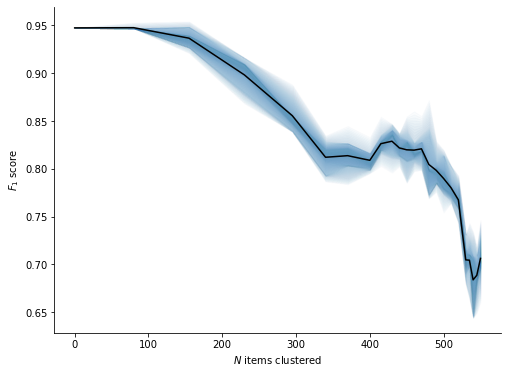

In [21]:
# Plot of VAM over all categories
fig, ax = plt.subplots(figsize=(8, 6))

xtick_labels = sorted(set(abstraction))
f1 = np.array(list(f1_scores.values()))
tsplot(f1.T, xtick_labels, line_color="k", color="C0", ax=ax)
ax.set(ylabel='$F_1$ score', xlabel='$N$ items clustered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

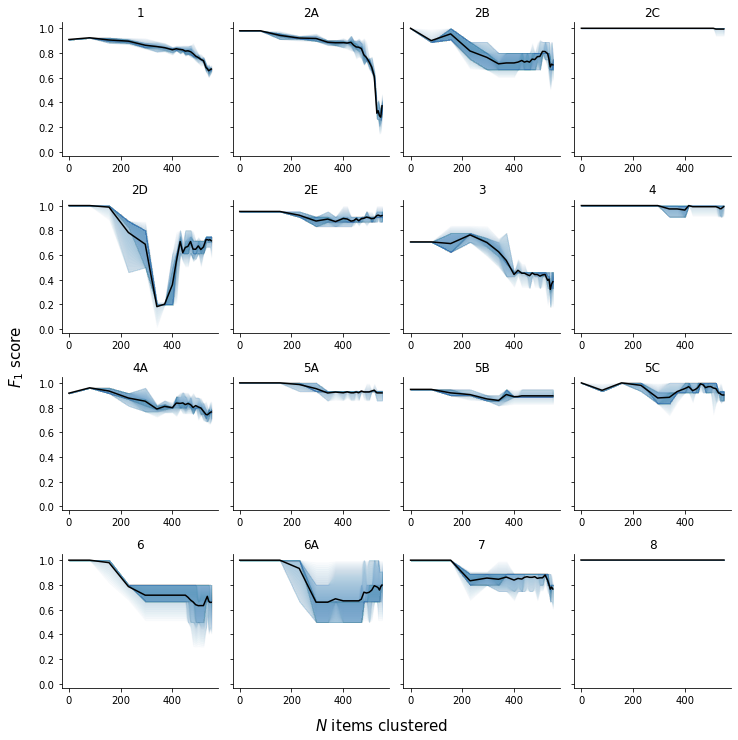

In [22]:
# Plots per category
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10), sharey=True)
axes = axes.flatten()
for i, (cat, scores) in enumerate(cat_scores.items()):
    scores = np.array(list(cat_scores[cat].values()))
    tsplot(scores.T, xtick_labels, line_color="k", color="C0", ax=axes[i])
    axes[i].set_title(cat)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

fig.text(0.5, -0.02, '$N$ items clustered', ha='center', fontsize=15)
fig.text(-0.02, 0.5, '$F_1$ score', va='center', rotation='vertical', fontsize=15)
plt.tight_layout()